In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
import os
import hvplot.pandas

In [48]:
output_folder = 'plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [49]:
df = pd.read_csv("smoke_detection_iot.csv")
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,0,1654733331,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0,0
1,1,1654733332,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,1,0
2,2,1654733333,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,2,0
3,3,1654733334,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,3,0
4,4,1654733335,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,4,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  FireAlarm       62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [51]:
df.shape

(62630, 16)

In [52]:
print(df.columns)

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [53]:
df = df.drop(['Unnamed: 0', 'UTC'], axis=1)

print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [54]:
df.shape

(62630, 14)

In [55]:
print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [56]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
count,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00
mean,15.97,48.54,1942.06,670.02,12942.45,19754.26,938.63,100.59,184.47,491.46,203.59,80.05,10511.39,0.71
std,14.36,8.87,7811.59,1905.89,272.46,609.51,1.33,922.52,1976.31,4265.66,2214.74,1083.38,7597.87,0.45
min,-22.01,10.74,0.00,400.00,10668.00,15317.00,930.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.99,47.53,130.00,400.00,12830.00,19435.00,938.70,1.28,1.34,8.82,1.38,0.03,3625.25,0.00
50%,20.13,50.15,981.00,400.00,12924.00,19501.00,938.82,1.81,1.88,12.45,1.94,0.04,9336.00,1.00
75%,25.41,53.24,1189.00,438.00,13109.00,20078.00,939.42,2.09,2.18,14.42,2.25,0.05,17164.75,1.00
max,59.93,75.20,60000.00,60000.00,13803.00,21410.00,939.86,14333.69,45432.26,61482.03,51914.68,30026.44,24993.00,1.00


In [57]:
df.FireAlarm.value_counts()

1    44757
0    17873
Name: FireAlarm, dtype: int64

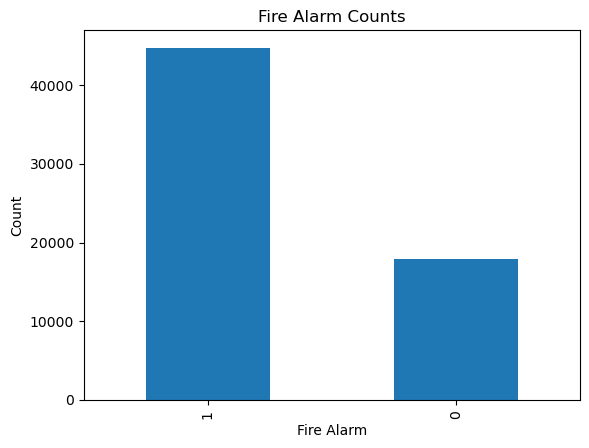

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the bar plot
value_counts = df['FireAlarm'].value_counts()
bar_plot = value_counts.plot(kind='bar', title="Fire Alarm Counts")
bar_plot.set_xlabel('Fire Alarm')
bar_plot.set_ylabel('Count')

# Save the bar plot as PNG and PDF in the default working directory
png_filename = 'Fire_Alarm_Counts.png'
pdf_filename = 'Fire_Alarm_Counts.pdf'

plt.savefig(png_filename, bbox_inches='tight')  # Save as PNG
plt.savefig(pdf_filename, bbox_inches='tight', format='pdf')  # Save as PDF

# Display the bar plot
plt.show()


In [59]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
FireAlarm         0
dtype: int64

In [60]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [61]:
categorical_val

['FireAlarm']

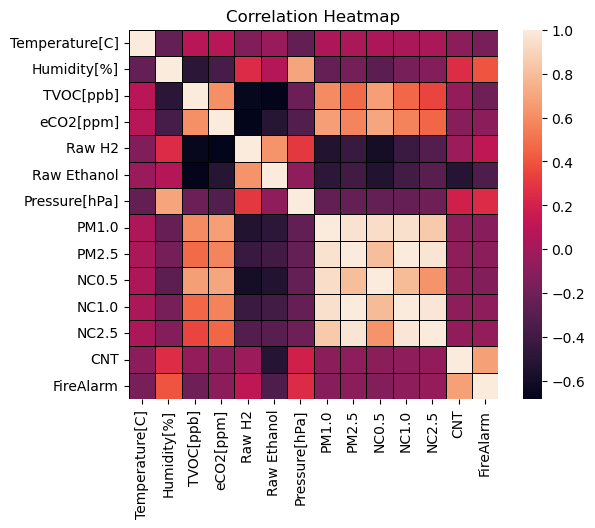

In [62]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
sns.heatmap(df.corr(), square=True, linecolor="black", linewidths=0.5)
plt.title("Correlation Heatmap")

# Save the heatmap as PNG and PDF in the default working directory
png_filename = 'correlation_heatmap.png'
pdf_filename = 'correlation_heatmap.pdf'

plt.savefig(png_filename)  # Save as PNG
plt.savefig(pdf_filename, format='pdf')  # Save as PDF


In [63]:
corr_matrix = df.corr()
max_corr={"Column":[],"Max Corr Column":[],"Corr":[]}
for i in corr_matrix:
    column_to_exclude = i
    corr_with_others = corr_matrix.drop(column_to_exclude)[column_to_exclude]

    if i in max_corr['Max Corr Column']: continue # stop redundant rows
        
    highest_corr_column = corr_with_others.idxmax()
    highest_corr_value = corr_with_others.max()
    
    max_corr["Column"].append(i)
    max_corr["Max Corr Column"].append(highest_corr_column)
    max_corr["Corr"].append(highest_corr_value)
        
max_corr = pd.DataFrame(max_corr,index=None).sort_values(by="Corr",ascending=False).reset_index(drop=True)

max_corr

,Column,Max Corr Column,Corr
0,NC1.0,PM2.5,1.00
1,NC2.5,NC1.0,0.97
2,PM1.0,PM2.5,0.96
3,eCO2[ppm],NC0.5,0.70
4,Humidity[%],Pressure[hPa],0.69
5,CNT,FireAlarm,0.67
6,Raw H2,Raw Ethanol,0.63
7,Temperature[C],TVOC[ppb],0.08
